## Regression and bias-variance trade-off when doing regression


In [1]:
#Importing packages
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
if "-f" in sys.argv:
    sys.argv.remove('-f')
LIB_DIR = os.path.expanduser('~/voltron/current/app/python/lib')
if os.path.exists(LIB_DIR) and LIB_DIR not in sys.path:
    sys.path.append(LIB_DIR)
    libexist = True
    from models import NNRegressor
else:
    libexist = False


Using TensorFlow backend.


In [3]:
def signal_func(x):
    return -(np.power(x,4) -1.2*np.power(x, 3) - 6.55*np.power(x,2)+ 0.75*x +20)
def noise(scale, size):
    return np.random.normal(scale=scale, size=size)
def generate_xy(xlow, xhi, size, noise_scale):
    domain = np.linspace(start=xlow, stop=xhi, num=300).reshape([-1,1])
    x = np.random.uniform(low=xlow, high=xhi, size=size)
    y = signal_func(x) + noise(scale=noise_scale, size=size)
    y = y.reshape([-1, 1]); x = x.reshape([-1,1])
    return x, y, domain

size=80
noise_scale=8.0
xlow= -3.6
xhi=3.2
x, y, domain = generate_xy(xlow=xlow, xhi=xhi, size=size, noise_scale=noise_scale)
x2, y2, domain = generate_xy(xlow=xlow, xhi=xhi, size=size, noise_scale=noise_scale)
x3, y3, domain = generate_xy(xlow=xlow, xhi=xhi, size=4*size, noise_scale=noise_scale)


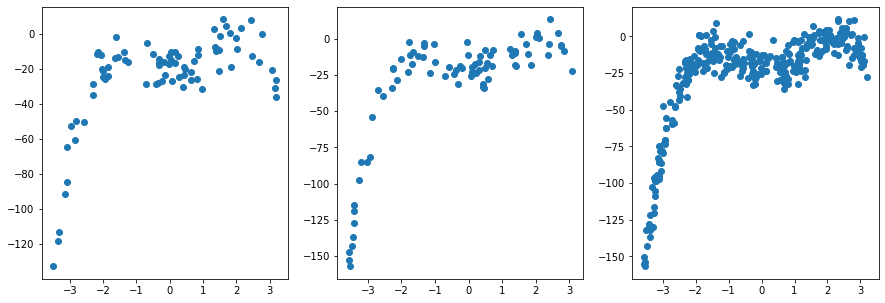

In [4]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in [0,1,2]:
    #ax[i].plot(domain, signal_func(domain), c='blue')
    pass
ax[0].scatter(x,y); ax[1].scatter(x2,y2); ax[2].scatter(x3,y3); plt.show()

In [5]:
def train_and_plot(m1, x, y, ax):
    m1.fit(x,y.flatten())
    ax.plot(domain, signal_func(domain), c='blue');
    ax.plot(domain, m1.predict(domain), c='red');
    ax.scatter(x,y)
    return

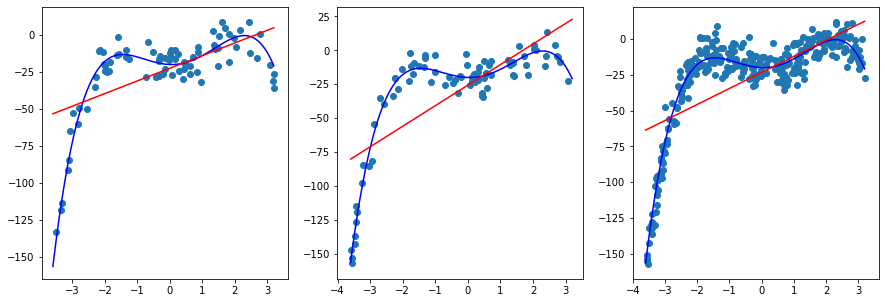

In [6]:
nnr = LinearRegression()
fig, ax = plt.subplots(1,3, figsize=(15,5))
train_and_plot(nnr, x3, y3, ax[2])
train_and_plot(nnr, x, y, ax[0])
train_and_plot(nnr, x2, y2, ax[1])
plt.show()

#---------------------- Linear Regression -----------------------------------------
#------"Find me a linear function that minimizes MSE" ------------------------------
#----------------------------------------------------------------------------------
#---------------------- UNDER-FITTING, HIGH BIAS LOW VARIANCE ---------------------
#---------------------- model is too "simple" -------------------------------------

Regression models often tries to minimize either mean-squared-error (MSE) or mean-absolute-error (MAE):
$$MSE = \frac{1}{n}\sum_{i=1}^{n} (Ypredicted_i - Yactual_i)^2$$
$$MAE = \frac{1}{n}\sum_{i=1}^{n} \left|Ypredicted_i - Yactual_i\right|$$

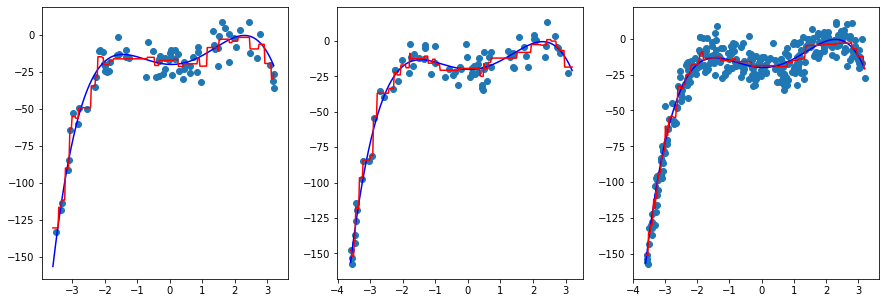

In [7]:
params = {'n_estimators':60, 'learning_rate':0.07}
nnr = GradientBoostingRegressor(**params)
fig, ax = plt.subplots(1,3, figsize=(15,5))
train_and_plot(nnr, x, y, ax[0])
train_and_plot(nnr, x2, y2, ax[1])
train_and_plot(nnr, x3, y3, ax[2])
plt.show()
#----------------------- Gradient Boosting Tree regression ---------------------------
#---------------"Find me a step function that minimizes MSE" -------------------------------
#------ Tune n_estimators for number of steps, tune learning_rate for the size of the steps

In [8]:
if libexist:
    params = {'depth':3, 'width':300, 'reg_rate':None, 'dropout_rate':0.0}
    nnr = NNRegressor(**params); fig, ax = plt.subplots(1,3, figsize=(15,5))
    train_and_plot(nnr, x, y, ax[0])
    train_and_plot(nnr, x2, y2, ax[1])
    train_and_plot(nnr, x3, y3, ax[2])
    plt.show()

#-------------- RELU Neural-net regression -----------------------------------------------------------------------------
#-------"Find me a piecewise linear function that minimizes MSE" --------------------------------------------------------
#-------Hyper-parameters determine the number of pieces available to construct the piece-wise linear function ----------
#-------------------------------------------------------------------------------------------------------------------------
#------------------- OVER-FITTING, OR LOW BIAS HIGH VARIANCE ------------------------------------------------------------
#------------------- model has too much freedom / is too complex / machine learning agent is "too smart" -----------------
#------------------- (big models are also slower to train) ---------------------------------------------------------------

Instructions for updating:
keep_dims is deprecated, use keepdims instead


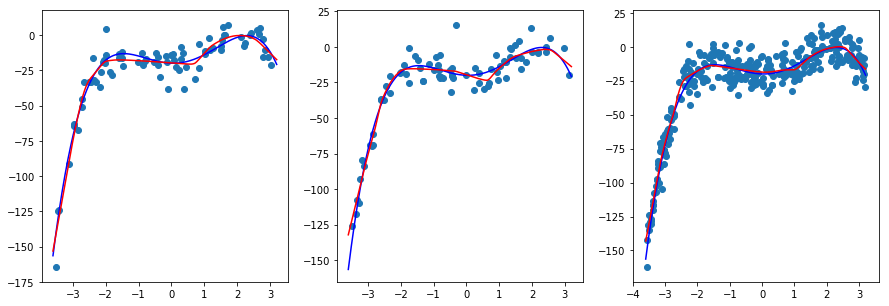

In [8]:
if libexist:
    params = {'depth':3, 'width':300,  'reg_rate':0.0002, 'dropout_rate':0.25}
    nnr = NNRegressor(**params)
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    train_and_plot(nnr, x, y, ax[0])
    train_and_plot(nnr, x2, y2, ax[1])
    train_and_plot(nnr, x3, y3, ax[2])
    plt.show()
#-------------------------- RELU Neural-net regression -----------------------------------------------------------
#---------------------------------- WITH REGULARIZATION -----------------------------------------------------------------
#--"Find me a piecewise linear function that minimizes MSE... But you are punished if you use too much brain power" --

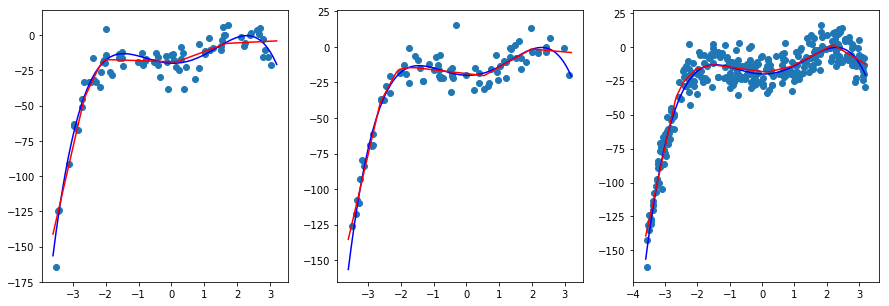

In [9]:
if libexist:
    params = {'depth':1, 'width':120, 'reg_rate':None, 'dropout_rate':0}
    nnr = NNRegressor(**params)
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    train_and_plot(nnr, x, y, ax[0])
    train_and_plot(nnr, x2, y2, ax[1])
    train_and_plot(nnr, x3, y3, ax[2])
    plt.show()

#-------------------------- RELU Neural-net regression ----------------------------------------------------------------
#---------------------------------- MIDDLE GROUND --------------------------------------------------------------
#-------------------- a model with middle level of complexity does ok -------------------------------------------
#-------------------- tune complexity by adjusting 'depth' and 'width' (adjust number of neurons available)-----------

In practice, it is best to choose the right level of model complexity AND also add regularization.

### Variable transformations

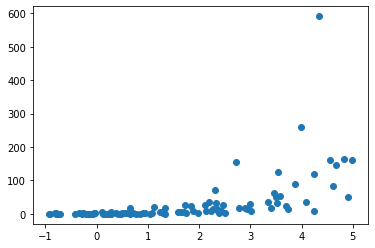

In [8]:
size=100
domain4 = np.linspace(start=-1,stop=5, num=200).reshape([-1,1])
x4 = np.random.uniform(low=-1, high=5, size=size).reshape([-1,1])
y4 = np.exp(x4 + np.random.normal(scale=1.0, size=size).reshape([-1,1]))
plt.scatter(x4,y4); plt.show()


An important reason to log-transform *y* is to have the correct error metric. For example if *y* is *price_psf*, a prediction of *1100* vs actual value of *1000* is not as bad as a prediction of *200* vs actual value of *100*, even though the absolute differences between prediction and actual value is the same. We want an error metric that consider (*1100* vs *1000*) the same as (*110* vs *100*), so we can define:
$$error = \log(y_{predicted}) - \log(y_{actual})$$
Notice that *error* $ = \log(1100) - \log(1000) = \log(1100/1000) = log(1.1) = \log(110) - \log(100)$, So the 2 cases have the same *error* value which is what we want.

To minimize this we just have to log-transform y, and try to predict $log(y)$ from $x$

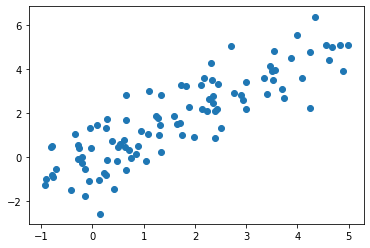

In [9]:
plt.scatter(x4, np.log(y4)); plt.show()

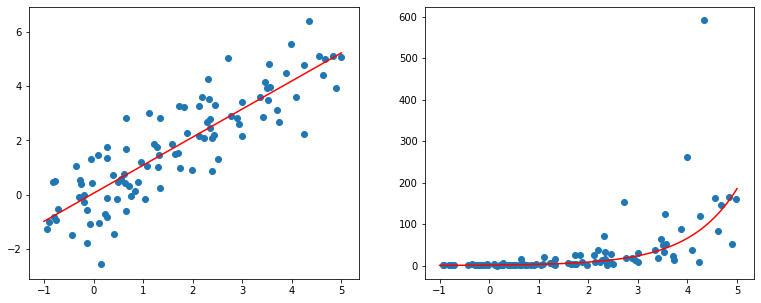

In [10]:
lr = LinearRegression()
lr.fit(x4, np.log(y4))
fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(domain4, lr.predict(domain4), c='red'); ax[0].scatter(x4, np.log(y4))
ax[1].plot(domain4, np.exp(lr.predict(domain4)), c='red'); ax[1].scatter(x4,y4)
plt.show()

/home/holamson/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


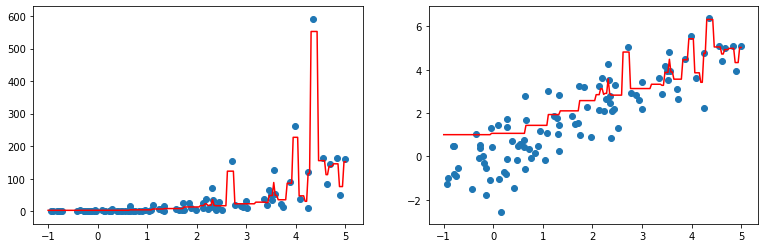

In [11]:
# EXAMPLE OF A BAD THING TO DO:
# fitting directly to the original dataset
params = {'n_estimators':60, 'learning_rate':0.07}
nnr = GradientBoostingRegressor(**params)
fig, ax = plt.subplots(1,2, figsize=(13,4))
nnr.fit(x4,y4)
ax[1].plot(domain4, np.log(nnr.predict(domain4)), c='red'); ax[1].scatter(x4,np.log(y4))
ax[0].plot(domain4, nnr.predict(domain4), c='red'); ax[0].scatter(x4,y4)
plt.show()
#----------------------- Gradient Boosting Tree regression --------------------------------
#--------------------- Fitted directly on the original data -------------------------------
#------------ Result is overfitting the data points with large y-magnitude ----------------
#-------------- And underfitting data points with small y magnitude -----------------------